# Visualizing the H-atom wavefunction and the Classical limit

Refer to the notes *341notes_H_atom.pdf* and do Exercises 1-3 before doing this assignment. 

### 1. Limit of large quantum numbers

The differences between the classical, semi-classical Bohr theory, and the fully quantum-mechanical Schrödinger theory are largest for small quantum numbers. In the following, we will show that the Schrödinger theory becomes more “Bohr-like” for larger quantum numbers, in the sense that the spatial probability density p(r,θ,ϕ)  becomes concentrated in a ring in the xy plane  and looks increasingly like a classical planar orbit for large n. The quantum numbers $\ell$ and m also take their maximum values $\ell=n-1,\,m=\ell=n-1$. The idea is to show that the wavefunction $\psi_{n,n-1,n-1}$ has a probability density that is most like an orbit in the x-y plane. 


1.1) Argue that an appropriate time-independent spatial probability density for the Bohr atom in the nth state can be defined as

$p_n^{Bohr}(r,\theta,\phi)=\frac{\delta(r-r_n)\delta(\theta-\pi/2)}{2\pi r^2sin\theta}$ and show that $p_n^{Bohr}(r,\theta,\phi)$ is normalized.

<div class="alert-success">
This is appropriate because the probability density is concentrated in a perfect ring, which is represented by the delta functions, which would have that the density lies only at $r=r_n$ and $\theta=\pi/2$. The volume integral over all space of this probability density function would be: $\int_0^{2\pi} \int_0^\pi \int_0^{\infty} \frac{\delta(r-r_n)\delta(\theta-\pi/2)}{2\pi r^2sin\theta}r^2\sin\theta dr d\theta d\phi = \int_0^{2\pi}\frac{1}{2\pi}d\phi=\frac{2\pi}{2\pi}=1$
</div>

1.2) The $\ell=n-1,m=n-1$ wavefunction $\Psi_n(r,\theta,\phi) \equiv R_{n,n-1}(r)Y_{n-1}^{n-1}(\theta,\phi)$ depends only on n. Choose n and set $\ell=n-1, m=n-1$ and make a 3D isosurface plot. Start with n=3. Describe the shape of the probability density and compare to the Bohr model.

In [22]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
import scipy.special
from scipy.special import sph_harm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import ListedColormap
import skimage
from skimage import measure

In [12]:
def hydrogen_wf(n,l,m,X,Y,Z):
    R = np.sqrt(X**2+Y**2+Z**2)
    Theta = np.arccos(Z/R)
    Phi = np.arctan2(Y,X)
    
    rho = 2.*R/n
    s_harm=sph_harm(m, l, Phi, Theta)
    l_poly = scipy.special.genlaguerre(n-l-1,2*l+1)(rho)
        
    prefactor = np.sqrt((2./n)**3*math.factorial(n-l-1)/(2.*n*math.factorial(n+l)))
    wf = prefactor*np.exp(-rho/2.)*rho**l*s_harm*l_poly
    wf = np.nan_to_num(wf)
    return wf

In [13]:
n=3          # Orbital quantum numbers
l=2
m=2

dz=0.25             # plot axis range will depend on n
zmin=-30
zmax=30

x = np.arange(zmin,zmax,dz)
y = np.arange(zmin,zmax,dz)
z = np.arange(zmin,zmax,dz)

X,Y,Z = np.meshgrid(x,y,z) #X, Y, Z are 3d arrays that tell us the values of x, y, and z at every point in space
data = hydrogen_wf(n,l,m,X,Y,Z)
data = abs(data)**2

R = np.sqrt(X**2+Y**2+Z**2)

rho = 2.*R/n

C:\Users\DJ\AppData\Local\Temp/ipykernel_22624/1230905048.py:3: RuntimeWarning: invalid value encountered in true_divide
  Theta = np.arccos(Z/R)


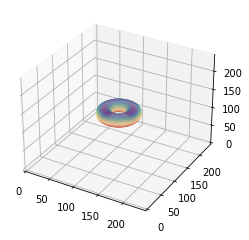

In [14]:
fig = plt.figure()         
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([0,len(x)])
ax.set_ylim([0,len(y)])
ax.set_zlim([0,len(z)])

max_val = np.max(data)

verts, faces, _, _ = measure.marching_cubes(data, max_val/2, spacing = (1,1,1))
result=ax.plot_trisurf(verts[:,0], verts[:,1], faces, verts[:,2], cmap ='Spectral', lw=0)

In [15]:
n=4          # Orbital quantum numbers
l=3
m=3

dz=0.25             # plot axis range will depend on n
zmin=-30
zmax=30

x = np.arange(zmin,zmax,dz)
y = np.arange(zmin,zmax,dz)
z = np.arange(zmin,zmax,dz)

X,Y,Z = np.meshgrid(x,y,z) #X, Y, Z are 3d arrays that tell us the values of x, y, and z at every point in space
data = hydrogen_wf(n,l,m,X,Y,Z)
data = abs(data)**2

R = np.sqrt(X**2+Y**2+Z**2)

rho = 2.*R/n

C:\Users\DJ\AppData\Local\Temp/ipykernel_22624/1230905048.py:3: RuntimeWarning: invalid value encountered in true_divide
  Theta = np.arccos(Z/R)


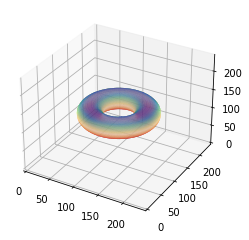

In [16]:
fig = plt.figure()         
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([0,len(x)])
ax.set_ylim([0,len(y)])
ax.set_zlim([0,len(z)])

max_val = np.max(data)

verts, faces, _, _ = measure.marching_cubes(data, max_val/2, spacing = (1,1,1))
result=ax.plot_trisurf(verts[:,0], verts[:,1], faces, verts[:,2], cmap ='Spectral', lw=0)

In [17]:
n=5          # Orbital quantum numbers
l=4
m=4

dz=0.25             # plot axis range will depend on n
zmin=-30
zmax=30

x = np.arange(zmin,zmax,dz)
y = np.arange(zmin,zmax,dz)
z = np.arange(zmin,zmax,dz)

X,Y,Z = np.meshgrid(x,y,z) #X, Y, Z are 3d arrays that tell us the values of x, y, and z at every point in space
data = hydrogen_wf(n,l,m,X,Y,Z)
data = abs(data)**2

R = np.sqrt(X**2+Y**2+Z**2)

rho = 2.*R/n

C:\Users\DJ\AppData\Local\Temp/ipykernel_22624/1230905048.py:3: RuntimeWarning: invalid value encountered in true_divide
  Theta = np.arccos(Z/R)


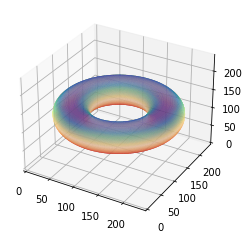

In [18]:
fig = plt.figure()         
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([0,len(x)])
ax.set_ylim([0,len(y)])
ax.set_zlim([0,len(z)])

max_val = np.max(data)

verts, faces, _, _ = measure.marching_cubes(data, max_val/2, spacing = (1,1,1))
result=ax.plot_trisurf(verts[:,0], verts[:,1], faces, verts[:,2], cmap ='Spectral', lw=0)

In [104]:
n=5          # Orbital quantum numbers
l=4
m=0

dz=0.25             # plot axis range will depend on n
zmin=-30
zmax=30

x = np.arange(zmin,zmax,dz)
y = np.arange(zmin,zmax,dz)
z = np.arange(zmin,zmax,dz)

X,Y,Z = np.meshgrid(x,y,z) #X, Y, Z are 3d arrays that tell us the values of x, y, and z at every point in space
data = hydrogen_wf(n,l,m,X,Y,Z)
data = abs(data)**2

R = np.sqrt(X**2+Y**2+Z**2)

rho = 2.*R/n

C:\Users\DJ\AppData\Local\Temp/ipykernel_22624/1230905048.py:3: RuntimeWarning: invalid value encountered in true_divide
  Theta = np.arccos(Z/R)


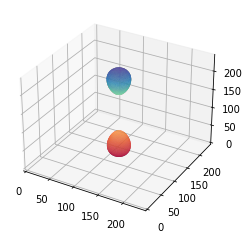

In [105]:
fig = plt.figure()         
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([0,len(x)])
ax.set_ylim([0,len(y)])
ax.set_zlim([0,len(z)])

max_val = np.max(data)

verts, faces, _, _ = measure.marching_cubes(data, max_val/2, spacing = (1,1,1))
result=ax.plot_trisurf(verts[:,0], verts[:,1], faces, verts[:,2], cmap ='Spectral', lw=0)

In [106]:
n=5          # Orbital quantum numbers
l=4
m=1

dz=0.25             # plot axis range will depend on n
zmin=-30
zmax=30

x = np.arange(zmin,zmax,dz)
y = np.arange(zmin,zmax,dz)
z = np.arange(zmin,zmax,dz)

X,Y,Z = np.meshgrid(x,y,z) #X, Y, Z are 3d arrays that tell us the values of x, y, and z at every point in space
data = hydrogen_wf(n,l,m,X,Y,Z)
data = abs(data)**2

R = np.sqrt(X**2+Y**2+Z**2)

rho = 2.*R/n

C:\Users\DJ\AppData\Local\Temp/ipykernel_22624/1230905048.py:3: RuntimeWarning: invalid value encountered in true_divide
  Theta = np.arccos(Z/R)


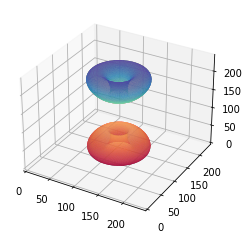

In [107]:
fig = plt.figure()         
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([0,len(x)])
ax.set_ylim([0,len(y)])
ax.set_zlim([0,len(z)])

max_val = np.max(data)

verts, faces, _, _ = measure.marching_cubes(data, max_val/2, spacing = (1,1,1))
result=ax.plot_trisurf(verts[:,0], verts[:,1], faces, verts[:,2], cmap ='Spectral', lw=0)

In [118]:
n=8          # Orbital quantum numbers
l=4
m=2

dz=0.25             # plot axis range will depend on n
zmin=-30
zmax=30

x = np.arange(zmin,zmax,dz)
y = np.arange(zmin,zmax,dz)
z = np.arange(zmin,zmax,dz)

X,Y,Z = np.meshgrid(x,y,z) #X, Y, Z are 3d arrays that tell us the values of x, y, and z at every point in space
data = hydrogen_wf(n,l,m,X,Y,Z)
data = abs(data)**2

R = np.sqrt(X**2+Y**2+Z**2)

rho = 2.*R/n

C:\Users\DJ\AppData\Local\Temp/ipykernel_22624/1230905048.py:3: RuntimeWarning: invalid value encountered in true_divide
  Theta = np.arccos(Z/R)


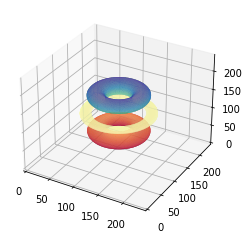

In [119]:
fig = plt.figure()         
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([0,len(x)])
ax.set_ylim([0,len(y)])
ax.set_zlim([0,len(z)])

max_val = np.max(data)

verts, faces, _, _ = measure.marching_cubes(data, max_val/2, spacing = (1,1,1))
result=ax.plot_trisurf(verts[:,0], verts[:,1], faces, verts[:,2], cmap ='Spectral', lw=0)

<div class="alert-success">

This would look just like the Bohr model if the circular cross-sections of this donut shape had a radius of zero.
    
</div>

1.3) Show that the expectation values of $\hat{H}, \hat{L^2}, \hat{L_z}$ in the state with quantum numbers n, ℓ=n-1, m=n-1 approach the values for the Bohr model when n >>1. 

The radial probability density $p_{n \ell}(r)$ is found by integrating $|\Psi_{n \ell m}(r,\theta,\phi)|^2$ over $\theta$ and $\phi$. This gives $p_{n \ell}(r) = r^2R_{n \ell}^2(r)$.

1.4) Use the recursion formula eq.(21) with ℓ=n-1 to show that the radial wavefunction becomes $R_{n,n-1}(r)=A_nr^{n-1}e^{-r/na}$.  Show that the radial probability density when $\ell=n-1$ is $p_n(r) = A_n^2 r^{2n}e^{-2r/na}$. What is the most probable value of r and how does it compare to the Bohr radius in state n? (You don't need to know $A_n$ for this.)

<div class="alert-success">

$\left\langle \hat{H} \right\rangle$ is just $E_n$ as was calculated in the homework to be $E_n=-\frac{\hbar^2}{2ma^2n^2}$, which was also shown in the homework to be equal to the Bohr result, which is $E=-\frac{1}{2}\frac{ke^2}{r}$. As $n \to \infty$, $r=an^2 \to \infty$, so both of these results go to zero.

For the hydrogen atom, $\left\langle \hat{L}^2 \right\rangle = \ell(\ell + 1)\hbar^2 = (n-1)n\hbar^2 \approx n^2\hbar^2 $ if $n>>1$.

For the Bohr model, $L^2 = (n\hbar)^2 = n^2\hbar^2$.
    
For the hydrogen atom, $\left\langle \hat{L}_z \right\rangle = m\hbar = (n-1)\hbar \approx n\hbar$ if $n>>1$.
    
For the Bohr model, $L_z = L = n\hbar$.
    
</div>

The following results are not difficult to obtain, but to avoid too much computation they will just be stated here. 

Expectation value of r:  $<r>_n=(2n+1)(na/2)$  

Expectation value of $r^2$: $<r^2>_n=(2n+2)(2n+1)(na/2)^2$ 

Find $\sigma_n^2$ and show that $\frac{ \sigma_n}{<r>_n} \rightarrow 0$ as $n \rightarrow \infty$.This quantity is a measure of the relative width of the distribution. Compare the results to the Bohr model for large n.

1.5) Next, we want to find the probability density of $\theta$. Eqs. (16) and (16') in the notes can be used to show that $Y_{\ell}^{\ell}(\theta,\phi)=B_{\ell}e^{i\ell \phi}(sin\theta)^{\ell}$. (You don't have to show it).  Let $Q_{\ell}(x)$ be the probability density of x=cos$\theta$. Starting with $ \int |\Psi_n(r,\theta,\phi)|^2r^2 sin \theta dr d\theta d\phi=1$, integrate over r and $\phi$,  change variables to $x=cos\theta$ and show that $ 2\pi B_{n-1}^2 \int_{-1}^1(1-x^2)^{n-1}dx = 1$. The probability density of x is then $Q_{n-1}(x)=2\pi B_{n-1}^2(1-x^2)^{n-1}$.

<div class="alert-success">

$\int_{All}\left|\Psi_n(r,\theta,\phi)\right|^2r^2\sin\!\theta drd\theta d\phi = \int_0^{2\pi}\int_0^\pi\int_0^\infty \left|R_{n,\ell}(r)Y_\ell^\ell(\theta,\phi)\right| ^2r^2\sin\!\theta drd\theta d\phi
= \int_0^{2\pi}\int_0^\pi\int_0^\infty \left| R_{n,\ell}(r)B_\ell e^{i\ell \phi}(\sin\!\theta)^\ell\right| drd\theta d\phi \\
\;= B_\ell^2\int_0^{2\pi}d\phi\int_0^\pi (\sin\!\theta)^{2\ell} d\theta\int_0^\infty \left|R_{n,\ell}(r)\right|^2 = 2\pi B_\ell^2\int_0^\pi (1-\cos^2\!\theta)^\ell d\theta = 2\pi B_\ell^2\int_{-1}^1(1-x^2)^\ell dx = 1$
    
</div>

1.6) For large n, $\ell=n-1 \approx n$. Show that $Q_n(x)$ becomes sharply peaked about x=0.  Hint: Find the half-width of $Q_n(x)$ at half-max, i.e. solve for $x_{1/2}$ such that $ Q_n(x_{1/2})= Q(0)/2.$ What are the implications of this result, and how is it related to the eigenvalues of $\hat{L^2}, \hat{L_z}$ in the large n limit?

<div class="alert-success">

$Q_n(x)$ is locally maximized where $x=0$, so $Q_{max}=Q_n(0)=2\pi B_n^2$. Thus, $Q_n(x_{1/2})=2\pi B_n^2(1-x_{1/2}^2)^n=\pi B_n^2$. So, $\\
2(1-x_{1/2}^2)^n=1,\\
(1-x_{1/2}^2)^n=\frac{1}{2},\\
1-x_{1/2}^2=\left(\frac{1}{2}\right)^\frac{1}{n},\\
x_{1/2}=\pm\sqrt{1-\left(\frac{1}{2}\right)^\frac{1}{n}}\approx\pm1$ for large $n$.

Thus, the half-width at half-max of $Q_n(x)$ is $Q_n(1)-Q_n(-1)=2\pi B_n^2(0)^n - 2\pi B_n^2(0) = 0$
    
This indicates that, for large $n$, this probability density is approximately a delta function at $x=0$. As $x=cos\theta$, $\theta=\frac{\pi}{2}$. This implies that the particle is concentrated into a nearly perfect ring for large $n$. In this limit, the eigenvalues of $\hat{L}^2$ and $\hat{L}_z$ go to infinity.
    
</div>

### 2. Other features of $\Psi_{n,\ell,m}$

2.1) Plot the radial wavefunction $R_{n,\ell}$ for a few values of n and $\ell$. For any n, which values of ℓ give the most wavelike (i.e. most radial nodes) behavior? What is expected classically? For which value of ℓ is 
$R_{n,\ell}(r=0)=0$?

<div class="alert-success">

Smaller values of $\ell$ give more wavelike behavior. Classically, you'd expect smaller angular momentums to result in the particle orbiting closer to the center, which is observed in the probability distribution for smaller $\ell$. For $n=10$, seemingly every value of $\ell$ gives $R=0$ where $r=0$.
    
</div>

2.2) Plot $p_{n \ell}(r)$ for large (10-ish) value of n and small value of $\ell$. How does the wavelength change as a function of r?  Compare to the radial wavefunction $R_{\ell m}(r)$.

<div class="alert-success">

The wavelength increases as $r$ increases.
    
</div>

2.3) Plot  $|\Psi_{n \ell m}|^2$ along the z-axis. What does the m=0 case correspond to? Note that $L_z$=0 for this case.
<div class="alert-success">

The $m=0$ case corresponds to orbitals that are oriented along the Z-axis.
    
</div>

2.4) Plot $|\Psi_{n \ell m}|^2$ for different values of n, $\ell=n-1$. How does the density change as m is varied?

<div class="alert-success">

As $m$ is varied, the proability distribution seems to become more concentrated. For $m\neq0$, none of the probability density is along the Z-axis.
    
</div>

Much of this code comes from
https://github.com/DalInar/schrodingers-snake/blob/master/Hydrogen/.ipynb_checkpoints/HydrogenOrbitals-checkpoint.ipynb  with modifications by L. Sparling. Ignore the slider stuff.

In [9]:
#check(a) returns info about array a
def check(a):
	print('min =  ' + str(np.min(a)) + '   max =  ' + str(np.max(a)) + '   shape = ' + str(np.shape(a)))


### Compute and plot the radial wavefunction $R_{n\ell}(r)$ and radial probability density $p_{n \ell}(r)$

In [32]:
def Rdata(n, l):
    
    rmax=5*n*n      #scale graph x-axis
    dr=rmax/400.
    r = np.arange(0,rmax,dr)
    ravg=(2*n+1)*n/2.       #expectation value <r>

    rho = 2.*r/n

    l_poly = scipy.special.genlaguerre(n-l-1,2*l+1)(rho)
    #check(l_poly)
    #check(rho)
    #check(ravg)
    prefactor = np.sqrt((2./n)**3*math.factorial(n-l-1)/(2.*n*math.factorial(n+l)))
    Rwf = prefactor*np.exp(-rho/2.)*rho**l*l_poly
    Rwf = np.nan_to_num(Rwf)     #radial wavefunction
    rprob = (r*Rwf)**2              #radial probability density
    A=[ravg,ravg]
    
    return r, Rwf, rprob, ravg

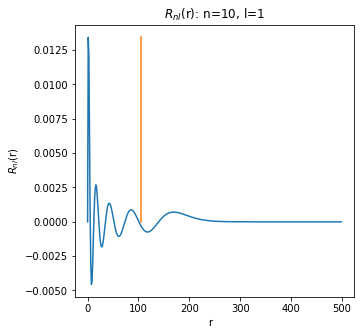

In [66]:
n = 10
l = 1
r, Rwf, rprob, ravg = Rdata(n, l)

#plot radial wavefunction
fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(5)
ax.plot(r, Rwf)            # radial wavefunction
ax.plot([ravg,ravg],[0,max(Rwf)])   #<r>
ax.set_title("$ R_{nl}$(r): n="+str(n)+", l="+str(l))         
plt.xlabel("r  ")
plt.ylabel("$ R_{nl}$(r)")  

plt.show()

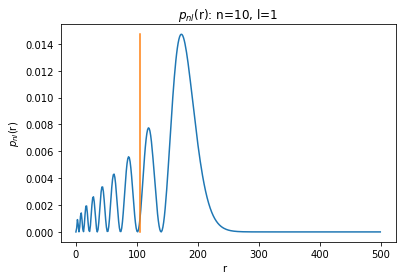

In [67]:
#plot radial probability density
plt.figure()
plt.plot(r, rprob)       # radial probability density
plt.plot([ravg,ravg],[0,max(rprob)])   #<r>
plt.title("$ p_{nl}$(r): n="+str(n)+", l="+str(l))         
plt.xlabel("r  ")
plt.ylabel("$ p_{nl}$(r)")         
plt.show()

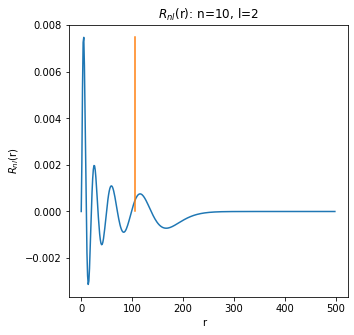

In [68]:
n = 10
l = 2
r, Rwf, rprob, ravg = Rdata(n, l)

#plot radial wavefunction
fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(5)
ax.plot(r, Rwf)            # radial wavefunction
ax.plot([ravg,ravg],[0,max(Rwf)])   #<r>
ax.set_title("$ R_{nl}$(r): n="+str(n)+", l="+str(l))         
plt.xlabel("r  ")
plt.ylabel("$ R_{nl}$(r)")  

plt.show()

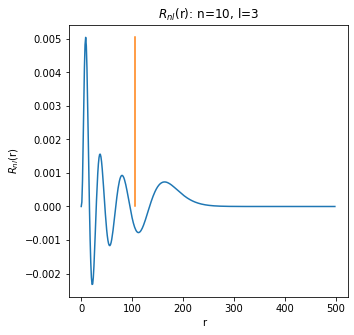

In [69]:
n = 10
l = 3
r, Rwf, rprob, ravg = Rdata(n, l)

#plot radial wavefunction
fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(5)
ax.plot(r, Rwf)            # radial wavefunction
ax.plot([ravg,ravg],[0,max(Rwf)])   #<r>
ax.set_title("$ R_{nl}$(r): n="+str(n)+", l="+str(l))         
plt.xlabel("r  ")
plt.ylabel("$ R_{nl}$(r)")  

plt.show()

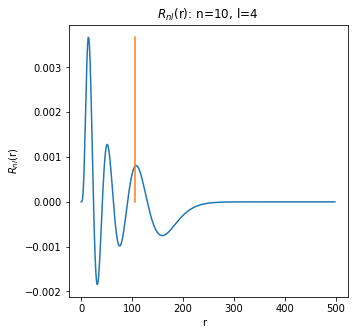

In [70]:
n = 10
l = 4
r, Rwf, rprob, ravg = Rdata(n, l)

#plot radial wavefunction
fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(5)
ax.plot(r, Rwf)            # radial wavefunction
ax.plot([ravg,ravg],[0,max(Rwf)])   #<r>
ax.set_title("$ R_{nl}$(r): n="+str(n)+", l="+str(l))         
plt.xlabel("r  ")
plt.ylabel("$ R_{nl}$(r)")  

plt.show()

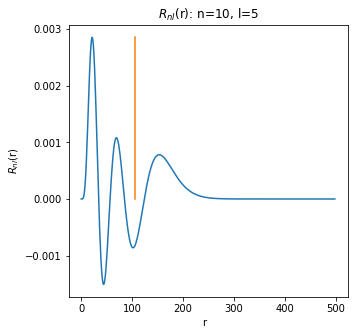

In [71]:
n = 10
l = 5
r, Rwf, rprob, ravg = Rdata(n, l)

#plot radial wavefunction
fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(5)
ax.plot(r, Rwf)            # radial wavefunction
ax.plot([ravg,ravg],[0,max(Rwf)])   #<r>
ax.set_title("$ R_{nl}$(r): n="+str(n)+", l="+str(l))         
plt.xlabel("r  ")
plt.ylabel("$ R_{nl}$(r)")  

plt.show()

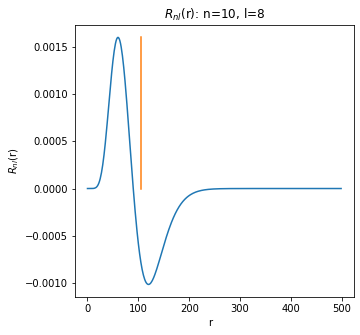

In [72]:
n = 10
l = 8
r, Rwf, rprob, ravg = Rdata(n, l)

#plot radial wavefunction
fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(5)
ax.plot(r, Rwf)            # radial wavefunction
ax.plot([ravg,ravg],[0,max(Rwf)])   #<r>
ax.set_title("$ R_{nl}$(r): n="+str(n)+", l="+str(l))         
plt.xlabel("r  ")
plt.ylabel("$ R_{nl}$(r)")  

plt.show()

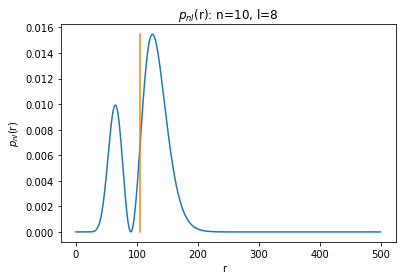

In [73]:
#plot radial probability density
plt.figure()
plt.plot(r, rprob)       # radial probability density
plt.plot([ravg,ravg],[0,max(rprob)])   #<r>
plt.title("$ p_{nl}$(r): n="+str(n)+", l="+str(l))         
plt.xlabel("r  ")
plt.ylabel("$ p_{nl}$(r)")         
plt.show()

### Compute and plot  $|\Psi_{n \ell m}|^2$ in the x-z plane.  The z-axis is horizontal. 
Ignore the slider stuff.

In [78]:
n=3          # Orbital quantum numbers
l=2
m=0

dz=0.25             # plot axis range will depend on n
zmin=-30
zmax=30

x = np.arange(zmin,zmax,dz)
y = np.arange(zmin,zmax,dz)
z = np.arange(zmin,zmax,dz)

X,Y,Z = np.meshgrid(x,y,z) #X, Y, Z are 3d arrays that tell us the values of x, y, and z at every point in space
data = hydrogen_wf(n,l,m,X,Y,Z)
data = abs(data)**2

R = np.sqrt(X**2+Y**2+Z**2)

rho = 2.*R/n

C:\Users\DJ\AppData\Local\Temp/ipykernel_22624/1230905048.py:3: RuntimeWarning: invalid value encountered in true_divide
  Theta = np.arccos(Z/R)


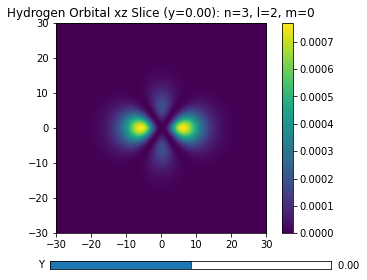

In [79]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.15, bottom=0.15)
im = plt.imshow(data[int((0-zmin)/dz),:,:], vmin=0, vmax = np.max(data), extent=[zmin,zmax,zmin,zmax])
plt.colorbar()
sli = Slider(plt.axes([0.25, 0.025, 0.65, 0.03]), "Y", z[0], z[len(z)-1], valinit=0)
ax.set_title("Hydrogen Orbital xz Slice (y="+str("%.2f"%sli.val)+"): n="+str(n)+", l="+str(l)+", m="+str(m))

def update(val):
    index = int((sli.val-zmin) / dz)
    im.set_data(data[index,:,:])
    ax.set_title("Hydrogen Orbital xz Slice (y="+str("%.2f"%sli.val)+"): n="+str(n)+", l="+str(l)+", m="+str(m))
       
#sli.on_changed(update)
plt.show()

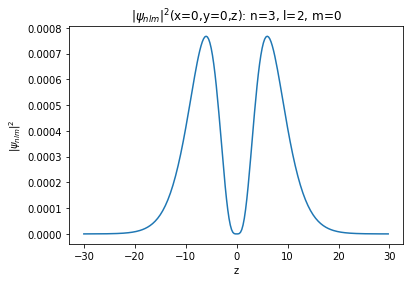

In [80]:
plt.figure()
plt.plot(z, data[int(len(z)/2),int(len(z)/2),:])
plt.title("$|\psi_{nlm}|^2$(x=0,y=0,z): n="+str(n)+", l="+str(l)+", m="+str(m))
plt.xlabel('z')
plt.ylabel("$|\psi_{nlm}|^2$")
plt.show()

In [87]:
n=3          # Orbital quantum numbers
l=2
m=1

dz=0.25             # plot axis range will depend on n
zmin=-30
zmax=30

x = np.arange(zmin,zmax,dz)
y = np.arange(zmin,zmax,dz)
z = np.arange(zmin,zmax,dz)

X,Y,Z = np.meshgrid(x,y,z) #X, Y, Z are 3d arrays that tell us the values of x, y, and z at every point in space
data = hydrogen_wf(n,l,m,X,Y,Z)
data = abs(data)**2

R = np.sqrt(X**2+Y**2+Z**2)

rho = 2.*R/n

C:\Users\DJ\AppData\Local\Temp/ipykernel_22624/1230905048.py:3: RuntimeWarning: invalid value encountered in true_divide
  Theta = np.arccos(Z/R)


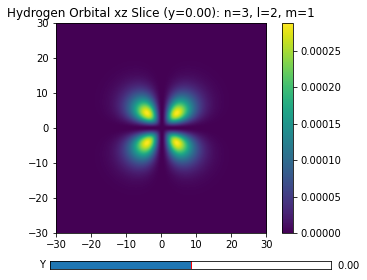

In [88]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.15, bottom=0.15)
im = plt.imshow(data[int((0-zmin)/dz),:,:], vmin=0, vmax = np.max(data), extent=[zmin,zmax,zmin,zmax])
plt.colorbar()
sli = Slider(plt.axes([0.25, 0.025, 0.65, 0.03]), "Y", z[0], z[len(z)-1], valinit=0)
ax.set_title("Hydrogen Orbital xz Slice (y="+str("%.2f"%sli.val)+"): n="+str(n)+", l="+str(l)+", m="+str(m))

def update(val):
    index = int((sli.val-zmin) / dz)
    im.set_data(data[index,:,:])
    ax.set_title("Hydrogen Orbital xz Slice (y="+str("%.2f"%sli.val)+"): n="+str(n)+", l="+str(l)+", m="+str(m))
       
#sli.on_changed(update)
plt.show()

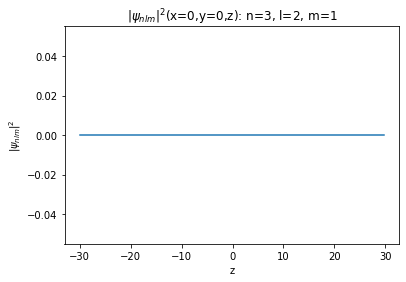

In [89]:
plt.figure()
plt.plot(z, data[int(len(z)/2),int(len(z)/2),:])
plt.title("$|\psi_{nlm}|^2$(x=0,y=0,z): n="+str(n)+", l="+str(l)+", m="+str(m))
plt.xlabel('z')
plt.ylabel("$|\psi_{nlm}|^2$")
plt.show()

In [90]:
n=3          # Orbital quantum numbers
l=2
m=2

dz=0.25             # plot axis range will depend on n
zmin=-30
zmax=30

x = np.arange(zmin,zmax,dz)
y = np.arange(zmin,zmax,dz)
z = np.arange(zmin,zmax,dz)

X,Y,Z = np.meshgrid(x,y,z) #X, Y, Z are 3d arrays that tell us the values of x, y, and z at every point in space
data = hydrogen_wf(n,l,m,X,Y,Z)
data = abs(data)**2

R = np.sqrt(X**2+Y**2+Z**2)

rho = 2.*R/n

C:\Users\DJ\AppData\Local\Temp/ipykernel_22624/1230905048.py:3: RuntimeWarning: invalid value encountered in true_divide
  Theta = np.arccos(Z/R)


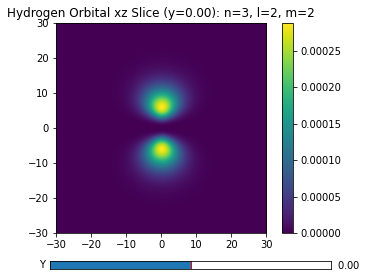

In [75]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.15, bottom=0.15)
im = plt.imshow(data[int((0-zmin)/dz),:,:], vmin=0, vmax = np.max(data), extent=[zmin,zmax,zmin,zmax])
plt.colorbar()
sli = Slider(plt.axes([0.25, 0.025, 0.65, 0.03]), "Y", z[0], z[len(z)-1], valinit=0)
ax.set_title("Hydrogen Orbital xz Slice (y="+str("%.2f"%sli.val)+"): n="+str(n)+", l="+str(l)+", m="+str(m))

def update(val):
    index = int((sli.val-zmin) / dz)
    im.set_data(data[index,:,:])
    ax.set_title("Hydrogen Orbital xz Slice (y="+str("%.2f"%sli.val)+"): n="+str(n)+", l="+str(l)+", m="+str(m))
       
#sli.on_changed(update)
plt.show()

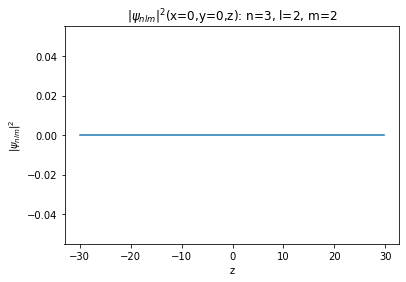

In [76]:
plt.figure()
plt.plot(z, data[int(len(z)/2),int(len(z)/2),:])
plt.title("$|\psi_{nlm}|^2$(x=0,y=0,z): n="+str(n)+", l="+str(l)+", m="+str(m))
plt.xlabel('z')
plt.ylabel("$|\psi_{nlm}|^2$")
plt.show()

In [91]:
n=4          # Orbital quantum numbers
l=3
m=0

dz=0.25             # plot axis range will depend on n
zmin=-30
zmax=30

x = np.arange(zmin,zmax,dz)
y = np.arange(zmin,zmax,dz)
z = np.arange(zmin,zmax,dz)

X,Y,Z = np.meshgrid(x,y,z) #X, Y, Z are 3d arrays that tell us the values of x, y, and z at every point in space
data = hydrogen_wf(n,l,m,X,Y,Z)
data = abs(data)**2

R = np.sqrt(X**2+Y**2+Z**2)

rho = 2.*R/n

C:\Users\DJ\AppData\Local\Temp/ipykernel_22624/1230905048.py:3: RuntimeWarning: invalid value encountered in true_divide
  Theta = np.arccos(Z/R)


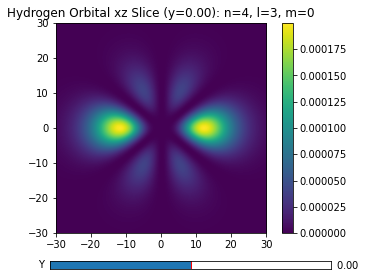

In [92]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.15, bottom=0.15)
im = plt.imshow(data[int((0-zmin)/dz),:,:], vmin=0, vmax = np.max(data), extent=[zmin,zmax,zmin,zmax])
plt.colorbar()
sli = Slider(plt.axes([0.25, 0.025, 0.65, 0.03]), "Y", z[0], z[len(z)-1], valinit=0)
ax.set_title("Hydrogen Orbital xz Slice (y="+str("%.2f"%sli.val)+"): n="+str(n)+", l="+str(l)+", m="+str(m))

def update(val):
    index = int((sli.val-zmin) / dz)
    im.set_data(data[index,:,:])
    ax.set_title("Hydrogen Orbital xz Slice (y="+str("%.2f"%sli.val)+"): n="+str(n)+", l="+str(l)+", m="+str(m))
       
#sli.on_changed(update)
plt.show()

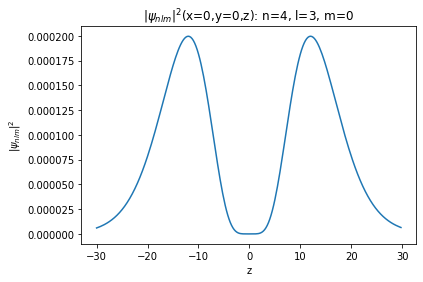

In [93]:
plt.figure()
plt.plot(z, data[int(len(z)/2),int(len(z)/2),:])
plt.title("$|\psi_{nlm}|^2$(x=0,y=0,z): n="+str(n)+", l="+str(l)+", m="+str(m))
plt.xlabel('z')
plt.ylabel("$|\psi_{nlm}|^2$")
plt.show()

In [94]:
n=4          # Orbital quantum numbers
l=3
m=1

dz=0.25             # plot axis range will depend on n
zmin=-30
zmax=30

x = np.arange(zmin,zmax,dz)
y = np.arange(zmin,zmax,dz)
z = np.arange(zmin,zmax,dz)

X,Y,Z = np.meshgrid(x,y,z) #X, Y, Z are 3d arrays that tell us the values of x, y, and z at every point in space
data = hydrogen_wf(n,l,m,X,Y,Z)
data = abs(data)**2

R = np.sqrt(X**2+Y**2+Z**2)

rho = 2.*R/n

C:\Users\DJ\AppData\Local\Temp/ipykernel_22624/1230905048.py:3: RuntimeWarning: invalid value encountered in true_divide
  Theta = np.arccos(Z/R)


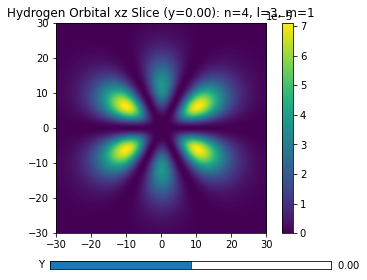

In [95]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.15, bottom=0.15)
im = plt.imshow(data[int((0-zmin)/dz),:,:], vmin=0, vmax = np.max(data), extent=[zmin,zmax,zmin,zmax])
plt.colorbar()
sli = Slider(plt.axes([0.25, 0.025, 0.65, 0.03]), "Y", z[0], z[len(z)-1], valinit=0)
ax.set_title("Hydrogen Orbital xz Slice (y="+str("%.2f"%sli.val)+"): n="+str(n)+", l="+str(l)+", m="+str(m))

def update(val):
    index = int((sli.val-zmin) / dz)
    im.set_data(data[index,:,:])
    ax.set_title("Hydrogen Orbital xz Slice (y="+str("%.2f"%sli.val)+"): n="+str(n)+", l="+str(l)+", m="+str(m))
       
#sli.on_changed(update)
plt.show()

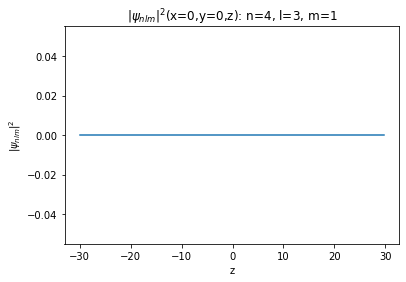

In [96]:
plt.figure()
plt.plot(z, data[int(len(z)/2),int(len(z)/2),:])
plt.title("$|\psi_{nlm}|^2$(x=0,y=0,z): n="+str(n)+", l="+str(l)+", m="+str(m))
plt.xlabel('z')
plt.ylabel("$|\psi_{nlm}|^2$")
plt.show()

In [97]:
n=4          # Orbital quantum numbers
l=3
m=2

dz=0.25             # plot axis range will depend on n
zmin=-30
zmax=30

x = np.arange(zmin,zmax,dz)
y = np.arange(zmin,zmax,dz)
z = np.arange(zmin,zmax,dz)

X,Y,Z = np.meshgrid(x,y,z) #X, Y, Z are 3d arrays that tell us the values of x, y, and z at every point in space
data = hydrogen_wf(n,l,m,X,Y,Z)
data = abs(data)**2

R = np.sqrt(X**2+Y**2+Z**2)

rho = 2.*R/n

C:\Users\DJ\AppData\Local\Temp/ipykernel_22624/1230905048.py:3: RuntimeWarning: invalid value encountered in true_divide
  Theta = np.arccos(Z/R)


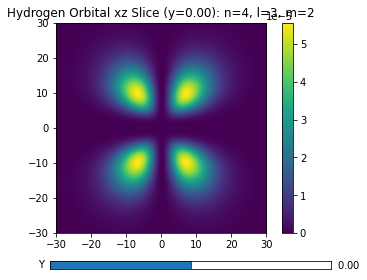

In [98]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.15, bottom=0.15)
im = plt.imshow(data[int((0-zmin)/dz),:,:], vmin=0, vmax = np.max(data), extent=[zmin,zmax,zmin,zmax])
plt.colorbar()
sli = Slider(plt.axes([0.25, 0.025, 0.65, 0.03]), "Y", z[0], z[len(z)-1], valinit=0)
ax.set_title("Hydrogen Orbital xz Slice (y="+str("%.2f"%sli.val)+"): n="+str(n)+", l="+str(l)+", m="+str(m))

def update(val):
    index = int((sli.val-zmin) / dz)
    im.set_data(data[index,:,:])
    ax.set_title("Hydrogen Orbital xz Slice (y="+str("%.2f"%sli.val)+"): n="+str(n)+", l="+str(l)+", m="+str(m))
       
#sli.on_changed(update)
plt.show()

In [102]:
n=4          # Orbital quantum numbers
l=3
m=3

dz=0.25             # plot axis range will depend on n
zmin=-30
zmax=30

x = np.arange(zmin,zmax,dz)
y = np.arange(zmin,zmax,dz)
z = np.arange(zmin,zmax,dz)

X,Y,Z = np.meshgrid(x,y,z) #X, Y, Z are 3d arrays that tell us the values of x, y, and z at every point in space
data = hydrogen_wf(n,l,m,X,Y,Z)
data = abs(data)**2

R = np.sqrt(X**2+Y**2+Z**2)

rho = 2.*R/n

C:\Users\DJ\AppData\Local\Temp/ipykernel_22624/1230905048.py:3: RuntimeWarning: invalid value encountered in true_divide
  Theta = np.arccos(Z/R)


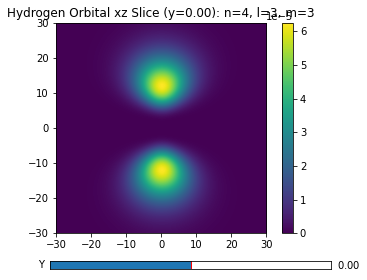

In [103]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.15, bottom=0.15)
im = plt.imshow(data[int((0-zmin)/dz),:,:], vmin=0, vmax = np.max(data), extent=[zmin,zmax,zmin,zmax])
plt.colorbar()
sli = Slider(plt.axes([0.25, 0.025, 0.65, 0.03]), "Y", z[0], z[len(z)-1], valinit=0)
ax.set_title("Hydrogen Orbital xz Slice (y="+str("%.2f"%sli.val)+"): n="+str(n)+", l="+str(l)+", m="+str(m))

def update(val):
    index = int((sli.val-zmin) / dz)
    im.set_data(data[index,:,:])
    ax.set_title("Hydrogen Orbital xz Slice (y="+str("%.2f"%sli.val)+"): n="+str(n)+", l="+str(l)+", m="+str(m))
       
#sli.on_changed(update)
plt.show()

In [108]:
n=8          # Orbital quantum numbers
l=3
m=3

dz=0.25             # plot axis range will depend on n
zmin=-30
zmax=30

x = np.arange(zmin,zmax,dz)
y = np.arange(zmin,zmax,dz)
z = np.arange(zmin,zmax,dz)

X,Y,Z = np.meshgrid(x,y,z) #X, Y, Z are 3d arrays that tell us the values of x, y, and z at every point in space
data = hydrogen_wf(n,l,m,X,Y,Z)
data = abs(data)**2

R = np.sqrt(X**2+Y**2+Z**2)

rho = 2.*R/n

C:\Users\DJ\AppData\Local\Temp/ipykernel_22624/1230905048.py:3: RuntimeWarning: invalid value encountered in true_divide
  Theta = np.arccos(Z/R)


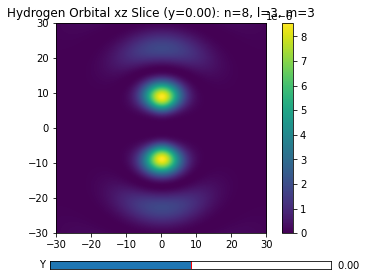

In [109]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.15, bottom=0.15)
im = plt.imshow(data[int((0-zmin)/dz),:,:], vmin=0, vmax = np.max(data), extent=[zmin,zmax,zmin,zmax])
plt.colorbar()
sli = Slider(plt.axes([0.25, 0.025, 0.65, 0.03]), "Y", z[0], z[len(z)-1], valinit=0)
ax.set_title("Hydrogen Orbital xz Slice (y="+str("%.2f"%sli.val)+"): n="+str(n)+", l="+str(l)+", m="+str(m))

def update(val):
    index = int((sli.val-zmin) / dz)
    im.set_data(data[index,:,:])
    ax.set_title("Hydrogen Orbital xz Slice (y="+str("%.2f"%sli.val)+"): n="+str(n)+", l="+str(l)+", m="+str(m))
       
#sli.on_changed(update)
plt.show()

In [110]:
n=8          # Orbital quantum numbers
l=3
m=1

dz=0.25             # plot axis range will depend on n
zmin=-30
zmax=30

x = np.arange(zmin,zmax,dz)
y = np.arange(zmin,zmax,dz)
z = np.arange(zmin,zmax,dz)

X,Y,Z = np.meshgrid(x,y,z) #X, Y, Z are 3d arrays that tell us the values of x, y, and z at every point in space
data = hydrogen_wf(n,l,m,X,Y,Z)
data = abs(data)**2

R = np.sqrt(X**2+Y**2+Z**2)

rho = 2.*R/n

C:\Users\DJ\AppData\Local\Temp/ipykernel_22624/1230905048.py:3: RuntimeWarning: invalid value encountered in true_divide
  Theta = np.arccos(Z/R)


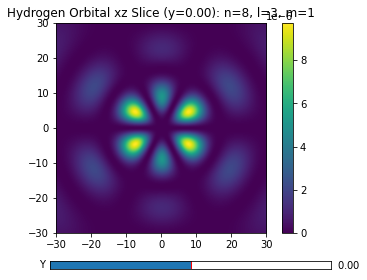

In [111]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.15, bottom=0.15)
im = plt.imshow(data[int((0-zmin)/dz),:,:], vmin=0, vmax = np.max(data), extent=[zmin,zmax,zmin,zmax])
plt.colorbar()
sli = Slider(plt.axes([0.25, 0.025, 0.65, 0.03]), "Y", z[0], z[len(z)-1], valinit=0)
ax.set_title("Hydrogen Orbital xz Slice (y="+str("%.2f"%sli.val)+"): n="+str(n)+", l="+str(l)+", m="+str(m))

def update(val):
    index = int((sli.val-zmin) / dz)
    im.set_data(data[index,:,:])
    ax.set_title("Hydrogen Orbital xz Slice (y="+str("%.2f"%sli.val)+"): n="+str(n)+", l="+str(l)+", m="+str(m))
       
#sli.on_changed(update)
plt.show()

### 3D Isosurfaces of  $|\Psi_{n \ell m}|^2$
Warning: this can be slow. Also, make sure the length of the axes is sufficient.

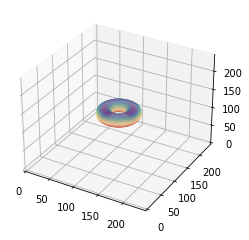

In [77]:
fig = plt.figure()         
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([0,len(x)])
ax.set_ylim([0,len(y)])
ax.set_zlim([0,len(z)])

max_val = np.max(data)

verts, faces, _, _ = measure.marching_cubes(data, max_val/2, spacing = (1,1,1))
result=ax.plot_trisurf(verts[:,0], verts[:,1], faces, verts[:,2], cmap ='Spectral', lw=0)

#sli = Slider(plt.axes([0.25, 0.025, 0.65, 0.03]), "iso", 0, max_val, valinit=max_val/2)
#ax.set_title("Hydrogen Orbital Isosurface ("+str("%.5f"%sli.val)+"): n="+str(n)+", l="+str(l)+", m="+str(m))

In [41]:
def update(val):              # don't need this
    ax.clear()
    verts, faces = measure.marching_cubes(data, sli.val, spacing = (1,1,1))
    result = ax.plot_trisurf(verts[:,0], verts[:,1], faces, verts[:,2], cmap ='Spectral', lw=0)
    ax.set_xlim([0,len(x)])
    ax.set_ylim([0,len(y)])
    ax.set_zlim([0,len(z)])
    ax.set_title("Hydrogen Orbital Isosurface ("+str("%.5f"%sli.val)+"): n="+str(n)+", l="+str(l)+", m="+str(m))
           
sli.on_changed(update)
plt.show()